In [8]:
# Importamos todos los paquetes que vamos a utilizar en este trabajo.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PUNTO 1 - Reconocimiento del Dataset

In [9]:
df = pd.read_csv("df_icd_2025.csv")

In [10]:
df.head()

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
0,2019-08-04,-34.563967,-58.456699,Capital Federal,Belgrano,Departamento,1.0,1.0,37,34,109500,Monoambiente de 4 años de antiguedad muy lumin...
1,2019-07-30,-34.563967,-58.456699,Capital Federal,Belgrano,Departamento,1.0,1.0,35,31,109500,IMPECABLE departamentoSuper luminoso En edific...
2,2020-10-13,-34.563290,-58.456581,Capital Federal,Belgrano,Departamento,1.0,1.0,30,30,78000,MONOAMBIENTE UBICACIÓN PRIVILEGIADA EN BELGRA...
3,2022-02-07,-34.563290,-58.456581,Capital Federal,Belgrano,Departamento,2.0,1.0,31,31,49000,Oficina transformada en dpto de 2 ...
4,2018-09-26,-34.563615,-58.456819,Capital Federal,Belgrano,Departamento,1.0,1.0,34,31,137500,Cerca de todo Av Cabildo centros de consumo m...


In [48]:
df.info

<bound method DataFrame.info of         created_on               l2                l3     prop_type  rooms  \
0       2019-08-04  Capital Federal          Belgrano  Departamento    1.0   
1       2019-07-30  Capital Federal          Belgrano  Departamento    1.0   
2       2020-10-13  Capital Federal          Belgrano  Departamento    1.0   
3       2022-02-07  Capital Federal          Belgrano  Departamento    2.0   
4       2018-09-26  Capital Federal          Belgrano  Departamento    1.0   
...            ...              ...               ...           ...    ...   
478734  2017-11-25  Capital Federal  Parque Patricios          Casa    4.0   
478735  2019-04-12  Capital Federal  Villa Pueyrredón  Departamento    2.0   
478736  2021-02-13  Capital Federal     Villa Soldati  Departamento    3.0   
478737  2018-01-19  Capital Federal         San Telmo            PH    2.0   
478738  2015-09-02  Capital Federal      Villa Lugano  Departamento    3.0   

        bathrooms  surface_total  surface_covered   price  \
0             1.0             37               34  109500   
1             1.0             35               31  109500   
2             1.0             30               30   78000   
3             1.0             31               31   49000   
4             1.0             34               31  137500   
...           ...            ...              ...     ...   
478734        1.0            119              124  160000   
478735        1.0             36               36   95000   
478736        1.0             50               50   75000   
478737        1.0             43               43  137000   
478738        2.0            116               83  120000   

                                              description  
0       Monoambiente de 4 años de antiguedad muy lumin...  
1       IMPECABLE departamentoSuper luminoso En edific...  
2       MONOAMBIENTE  UBICACIÓN PRIVILEGIADA EN BELGRA...  
3                   Oficina transformada en dpto de 2 ...  
4       Cerca de todo Av Cabildo  centros de consumo m...  
...                                                   ...  
478734  Corredor Responsable Hernan Perrone  CUCICBA 2...  
478735  Corredor Responsable ARIEL CHAMPANIER  CUCICBA...  
478736  Corredor Responsable Cristian Arnal Ponti  CUC...  
478737  Corredor Responsable Uno Bienes Raices SRL  CU...  
478738  piso por escaleraliving 450x450  comedor 4x525...  

[465897 rows x 10 columns]>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478739 entries, 0 to 478738
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_on       478739 non-null  object 
 1   lat              478739 non-null  float64
 2   lon              478739 non-null  float64
 3   l2               478739 non-null  object 
 4   l3               478739 non-null  object 
 5   prop_type        478739 non-null  object 
 6   rooms            478739 non-null  float64
 7   bathrooms        478739 non-null  float64
 8   surface_total    478739 non-null  int64  
 9   surface_covered  478739 non-null  int64  
 10  price            478739 non-null  int64  
 11  description      478739 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 43.8+ MB


Se trata de un dataset de 478.739 filas y 12 columnas en su mayoria numericas y en el cual no se observan datos faltantes pero si datos duplicados. Es un dataset sobre propiedades en Capital Federal y Buenos Aires, discriminadas por barrio con información sobre superficie, ubicación, precio y datos de interes como superficie cubierta y cantidad de baños. Ademas agrega una descripcion de la propiedad. Se trata del conjunto de datos que una persona en busqueda activa de propiedades estaria interesada en conocer.


In [49]:
df.describe()

,rooms,bathrooms,surface_total,surface_covered,price
count,465897.000000,465897.000000,465897.000000,465897.000000,4.658970e+05
mean,2.788007,1.491207,107.844983,91.523588,2.835006e+05
std,1.462752,0.843328,986.417660,882.513733,7.568282e+05
min,1.000000,0.000000,10.000000,1.000000,2.170000e+03
25%,2.000000,1.000000,45.000000,40.000000,1.099000e+05
50%,3.000000,1.000000,66.000000,58.000000,1.600000e+05
75%,4.000000,2.000000,105.000000,90.000000,2.640000e+05
max,40.000000,20.000000,184000.000000,170000.000000,1.115550e+08


In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
df.drop(columns=["lat","lon"],axis=1,inplace=True)

# PUNTO 2 - Filtrado del Dataset

De acuerdo a la asignación del grupo 7 procedemos a realizar el filtrado correspondiente los barrios de "Congreso", "Parque Chacabuco", "Villa Urquiza" y "Palemro".

In [14]:
barrios_equipo7 = ['Congreso', 'Parque Chacabuco', 'Villa Urquiza', 'Palermo']
df_e7= df[df['l3'].isin(barrios_equipo7)]
df_e7.head()

,created_on,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
590,2020-11-17,Capital Federal,Palermo,Departamento,2.0,1.0,45,40,87750,VENTA DEPARTAMENTO PALERMO HOLLYWOOD estrenar ...
591,2021-06-23,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,124800,MOOD NICETOIngresa a la Comunidad MOODNICETO V...
592,2017-08-30,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...
593,2020-11-25,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,117000,OPORTUNIDAD DE INVERSIÓN EN PALERMO HOLLYWOODU...
594,2017-07-27,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...


In [15]:
df_e7.tail()

,created_on,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
478718,2017-08-22,Capital Federal,Palermo,Departamento,1.0,1.0,42,24,130000,A ESTRENAR Excelente ubicación a metros del J...
478722,2017-01-03,Capital Federal,Palermo,Departamento,6.0,3.0,275,275,1100000,EXCELENTE PISO SOBRE FIGUEROA ALCORTA Reciclad...
478725,2019-12-29,Capital Federal,Parque Chacabuco,Departamento,3.0,2.0,145,105,180000,Corredor Responsable OSCAR N LIBERMAN CUCICBA...
478726,2017-10-19,Capital Federal,Parque Chacabuco,Departamento,2.0,1.0,34,34,75000,BAJAS EXPENSASDEPARTAMENTO DE 2 AMB 34 M2 TOT...
478730,2019-12-02,Capital Federal,Palermo,Casa,5.0,2.0,700,288,490000,Corredor Responsable CARLA HERRERA COL 1050Co...


Ahora procedemos a realizar el filtrado por los tipos de propiedad "Departamento", "Casa" y "PH".  

In [16]:
tipos_de_prop = ["Departamento","Casa", "PH"]
df_ee7 = df_e7[df_e7['prop_type'].isin(tipos_de_prop)]
df_ee7.head()

,created_on,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
590,2020-11-17,Capital Federal,Palermo,Departamento,2.0,1.0,45,40,87750,VENTA DEPARTAMENTO PALERMO HOLLYWOOD estrenar ...
591,2021-06-23,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,124800,MOOD NICETOIngresa a la Comunidad MOODNICETO V...
592,2017-08-30,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...
593,2020-11-25,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,117000,OPORTUNIDAD DE INVERSIÓN EN PALERMO HOLLYWOODU...
594,2017-07-27,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...


In [17]:
df_ee7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94740 entries, 590 to 478730
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_on       94740 non-null  object 
 1   l2               94740 non-null  object 
 2   l3               94740 non-null  object 
 3   prop_type        94740 non-null  object 
 4   rooms            94740 non-null  float64
 5   bathrooms        94740 non-null  float64
 6   surface_total    94740 non-null  int64  
 7   surface_covered  94740 non-null  int64  
 8   price            94740 non-null  int64  
 9   description      94740 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 10.0+ MB


# PUNTO 3 - Analisis Exploratorio

In [18]:
df_ee7.columns
target = "price"
regresores_orig = ['rooms', 'bathrooms', 'surface_total', 'surface_covered']
numericas = [target] + regresores_orig
df_num = df_ee7[numericas]
df_num

,price,rooms,bathrooms,surface_total,surface_covered
590,87750,2.0,1.0,45,40
591,124800,2.0,1.0,52,42
592,169000,1.0,1.0,42,42
593,117000,2.0,1.0,52,42
594,169000,1.0,1.0,42,42
...,...,...,...,...,...
478718,130000,1.0,1.0,42,24
478722,1100000,6.0,3.0,275,275
478725,180000,3.0,2.0,145,105
478726,75000,2.0,1.0,34,34


# A. Matriz de Correlaciones


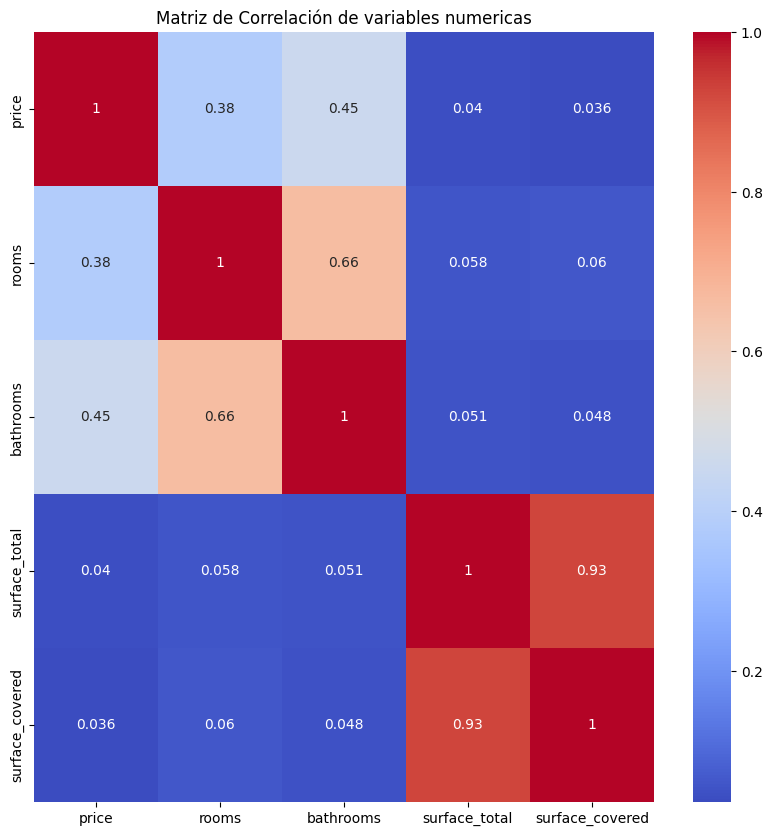

In [19]:
import seaborn as sns
corr = df_num.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de variables numericas')
plt.show()

La correlación que existe entre "surface_total" y "surface_covered" es positiva y la magnitud es de 0.93, lo que quiere decir que existe una relación lineal casi perfecta entre ambas variables. Esta fuerte relación lineal tiene sentido práctico, ya que la superficie cubierta es necesariamente igual o menor que la superficie total. En particular, lo que nos dice la magnitud es que, en promedio, un incremento en un metro cuadrado en la superficie total esta asociado a un incremento de 0,93 metros cuadrados en la superficie cubierta. Esta fuerte relación lineal podría inducir colinealidad en el modelo, por lo que sería razonable eliminar una de las variables y quedarnos con la otra, como vamos a hacer más adelante.
Por otro lado, la correlación entre "rooms" y "bathrooms" tambien es positiva y la magnitud es de 0.66. Lo que implicaría que, en promedio, agregar una habitación en un inmueble está asociado con la inclusión de 0.66 baños adicionales, esto es, un baño cada tres habitaciones.

B. La correlacion entre el target "price" con las variables es diversa, con "rooms" es positiva de 0,38, con la variable "bathrooms" tambien es positiva tambien en 0,45 siendo la mayor solo con la lectura de los datos y sin modificaciones, para "surface_total" y "surface_covered" es de 0.04 y 0.036 respectivamente siendo muy bajas por lo que podemos concluir que price se relaciona mayormente con rooms y bathrooms. Si bien las relaciones con el resto de variables es más debil que las anteriormente mencionadas se pueden sacar algunas conclusiones preliminares; por un lado, más habitaciones están asociadas a precios mayores, aunque no tan marcadamente como los baños, y por otro, que la baja correlación con las variables de la superficie se pueden deber a que existen otras causas que afecten esta relación, como por ejemplo, la existencia de outliers (que luego limpiaremos), la existencia de una relación no lineal entre el precio y la superficie (causa teórica, aunque no creemos que sea una causa real de esta distorsión), y la variabilidad entre los precios en distintas zonas.

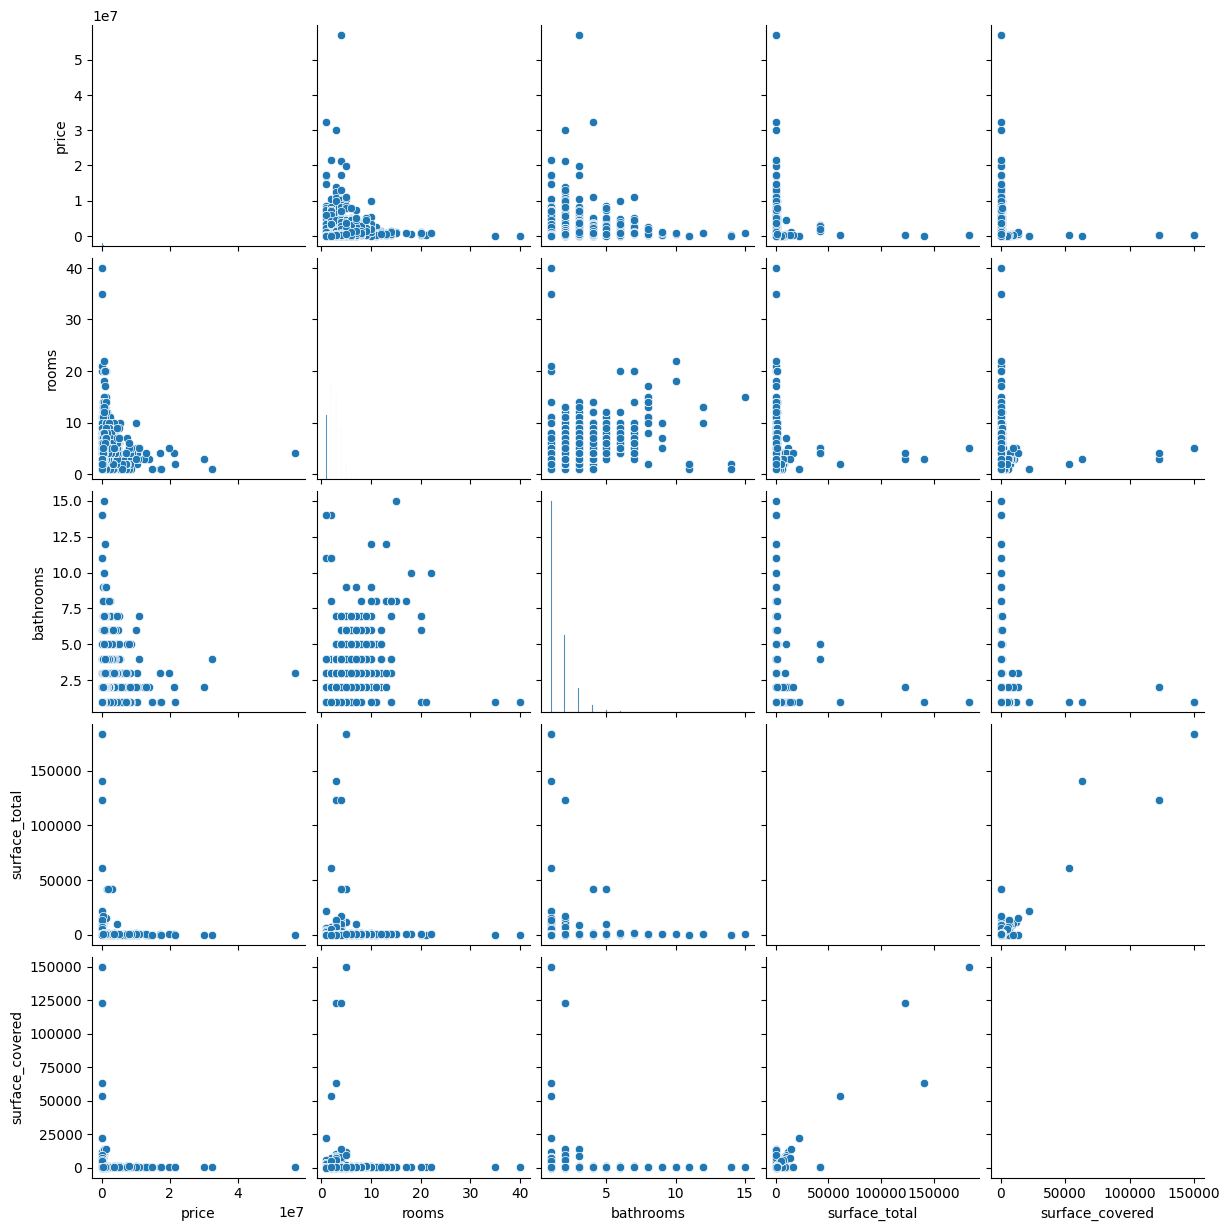

In [60]:
sns.pairplot(df_num)

En este Pairplot lo que buscamos es poder observar de forma mas intuitiva el comportamiento de los datos entre sí, es decir, buscamos poder tener visualmente la correlación y colinealidad entre variables, la distribución de los datos y posibles outliers y observar la simetría y agrupamientos de las observaciones. En la diagonal podremos ver el histograma de la variable en cuestion. Lo que se vé es que a simple viste no existe una clara relación lineal entre el precio y las variables de la superficie (por ello el bajo coeficiente de correlación), y por otro lado que existen valores extremos muy grandes que podrían estar distorsionando el analisis. Por otro lado, como mencionamos anteriormente, la correlación entre superficie total y superficie cubierta sigue casi una recta de 45° (relacion lineal perfecta) como mencionamos anteriormente, y finalmente la relación entre baños y habitaciones tambien es bastante fuerte pero en menor magnitud que la anterior, por lo que presenta mas dispersión.

# C. Estadísticas Descriptivas de "price"

In [20]:
df_ee7[target].describe()

,price
count,9.474000e+04
mean,2.997208e+05
std,5.273690e+05
min,2.170000e+03
25%,1.250000e+05
50%,1.790000e+05
75%,2.930000e+05
max,5.693922e+07


A partir de las estadisticas descriptivas podemos mencionar que esta muestra de datos presenta una gran dispersión (dado el gran desvío estandar), lo que implica una gran heterogeneidad en precios, lo cual podría ser esperable de una muestra tan grande y diversa. Por otro lado, se puede mencionar que la distribución de la misma esta sesgada hacia la derecha (Cola derecha extendida, dado que la gran diferencia entre el valor máximo y la media), y por otro lado, presenta asimetría positiva.

/tmp/ipython-input-50-2946410484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ee7["log_price"] = np.log(df_ee7["price"])


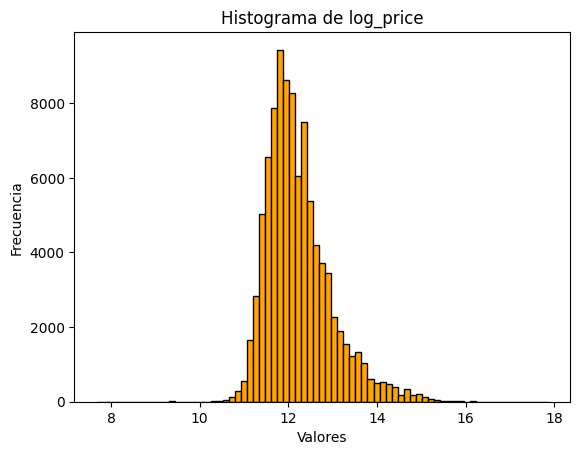

In [50]:
df_ee7["log_price"] = np.log(df_ee7["price"])
df_ee7['log_price'].plot(kind='hist', bins=75, color='orange', edgecolor='black')
plt.title('Histograma de log_price')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Se cumple con la consigna de diseñar histograma de la variable, se aplica transformación logaritmica para entender la distribución y sobre todo apreciarla ya que sin este procedimiento el grafico resulta irrelevante y aporta poca información debido a la presencia de Outliers que distorsionan el gráfico. Lo que se puede comentar adicionalmente es que el gráfico pareciera presentar una forma aproximadamente normal centrada alrededor del valor del logaritmo cercano a 12, lo que equivale a aproximadamente U$S 160.000. Esta transformación lo que permite es, no solo modelar mejor los datos, sino interpretar los coeficientes en términos de variaciones porcentuales, algo que resulta bastante útil para este tipo de analisis. Finalmente, podemos concluir que la transformación logaritmica mejora la distribución y permite un modelado mas robusto (corrige asimetria y disminuye la palanca de los outliers).

# **D. Estadísticas descriptivas por tipo de propiedad**

In [21]:
df_ee7.groupby("prop_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
prop_type,,,,,,,,
Casa,2182.0,546024.878093,596257.940878,38000.0,249900.0,369000.0,600000.0,5500000.0
Departamento,85565.0,299198.620838,543734.584190,2170.0,121600.0,175000.0,285000.0,56939221.0
PH,6993.0,229256.144144,125054.605590,35000.0,144900.0,198000.0,285000.0,1575000.0


Podemos mencionar que el promedio del precio de las casas es ampliamente mayor al promedio del precio en los departamentos como en los PH. Aquí pueden influir ciertas cuestiones como la existencia de casas con grandes terrenos, mientras que los departamentos y PHs tienen una clara limitación en términos de espacio físico (mts^2). Por otro lado, se destaca que los PHs tienen un menor desvío que las casas y los departamentos, lo que sugeriría un mercado mas homogeneo con una menor diferenciación entre productos. Por el lado de los departamentos se destaca el peso estadistico (la mayor parte de las observaciones estan concentradas en productos de este tipo), y el gran desvío estandar que presenta, motivado por la presencia de outliers (el precio máximo es de U$S 57MM), lo que distorsiona la media de la muestra.

En definitiva lo que nos dice esto es que el tipo de propiedad influye de manera clara en el precio promedio y la dispersión. Quizás donde es más significativo el efecto es en casas y departamentos (mucha heterogeneidad en los productos).

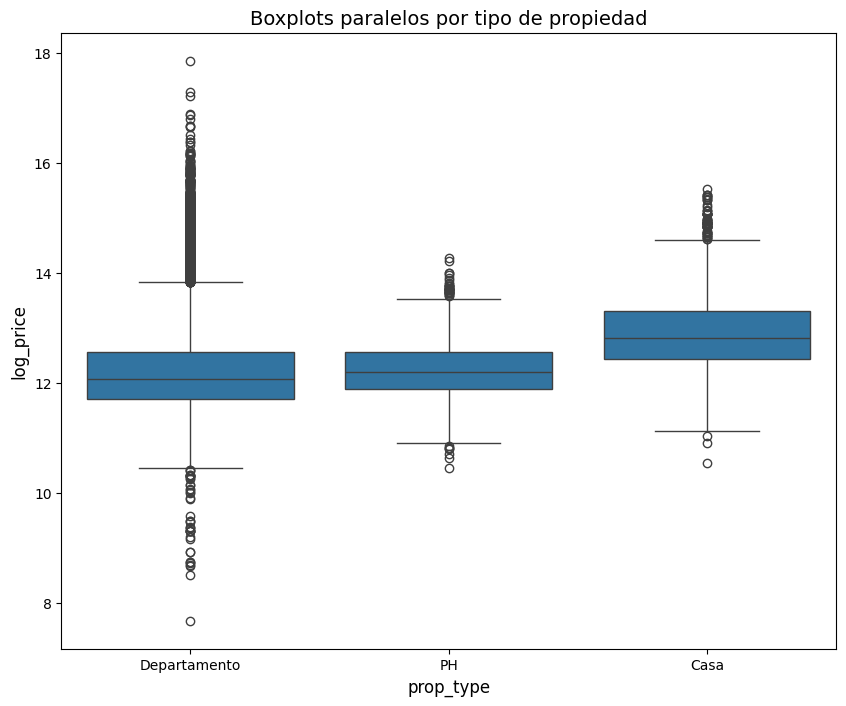

In [51]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='prop_type', y='log_price', data=df_ee7)
plt.title('Boxplots paralelos por tipo de propiedad', fontsize=14)
plt.xlabel('prop_type', fontsize=12)
plt.ylabel('log_price', fontsize=12)
plt.show()

Este tipo de gráfico lo que permite es observar visualmente lo que ocurre con la distribución de la muestra para cada categoría. En el caso de departamentos se cumple lo que habiamos mencionado anteriormente, existe una dispersión en los datos motivada por la existencia de valores atípicos, lo mismo sucede en las casas, aunque con una muestra con una cantidad significativamente menor de observaciones. En el caso de los PHs se puede observar una menor dispersión reflejada tanto en el tamaño de la caja (comparativamente menor que departamentos y casas, lo que sugiere una mayor concentración), como en los "bigotes" de la caja. Esto sugiere una mayor homogeneidad, aunque nuevamente como en el caso de las casas, la muestra es significativamente menor que los departamentos en términos de observaciones.

Por otro lado, si observamos las medianas podemos ver que el producto mas accesible, en promedio, son los departamentos seguidos por los PH y las casas (aunque la existencia de productos "premium" o lujosos logran que exista una asimetría positiva y una amplia dispersión en el 50% de la muestra).

# E. Scatterplot de "price" y "surface_total"

<Axes: xlabel='surface_total', ylabel='price'>

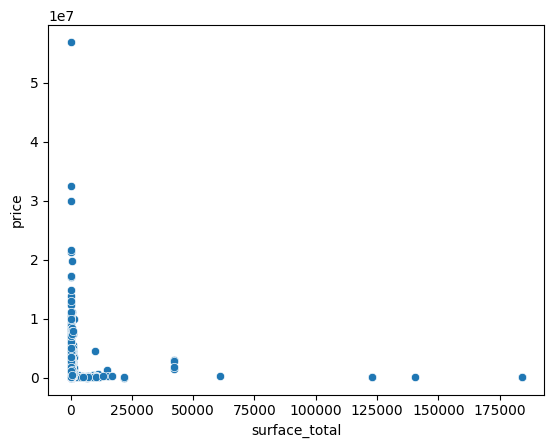

In [52]:
sns.scatterplot(x="surface_total", y = "price", data = df_ee7)

Se observan anomalias, esto es, hay propiedades que tienen superficie cubierta con metraje muy por encima del rango en donde se concentran la mayoria. Pasa lo mismo con los precios, hay valores que son muy altos respecto a la mayoria lo que indica que se deben corregir esos outliers para poder trabajar con un modelo que generalice bien.

<Axes: xlabel='surface_total', ylabel='log_price'>

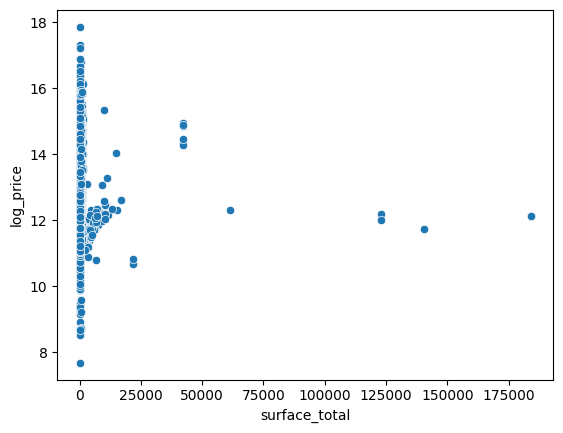

In [53]:
sns.scatterplot(x="surface_total", y = "log_price", data = df_ee7)

Se observan anomalias. Hay algunas propiedades de superficies muy pequeñas a precios extraordinariamente altos. Por otro lado se observan propiedades de grandes superficies a bajos precios.


# F. Eliminación de Outliers

In [22]:
no_outlier=["price","rooms","surface_total"]
df_ee7_so = df_ee7.copy()
for columna in no_outlier:
    Q1 = df_ee7_so[columna].quantile(0.25)
    Q3 = df_ee7_so[columna].quantile(0.75)
    IQR = Q3 - Q1
    df_ee7_so = df_ee7_so[(df_ee7_so[columna] >= Q1 - 1.5 * IQR) & (df_ee7_so[columna] <= Q3 + 1.5 * IQR)]


Para eliminar outliers, se aplicó el criterio estadistico basado en el rango intercuartilico (IQR). Este tecnica nos permite excluir observaciones extremas sin hacer supuestos sobre la distribución de los datos, la aplicación de este metodo garantiza un conjunto de datos mas robusto y adecuado para poner en marcha modelos predictivos sin la influencia de valores atipicos que distorsionen los resultados.

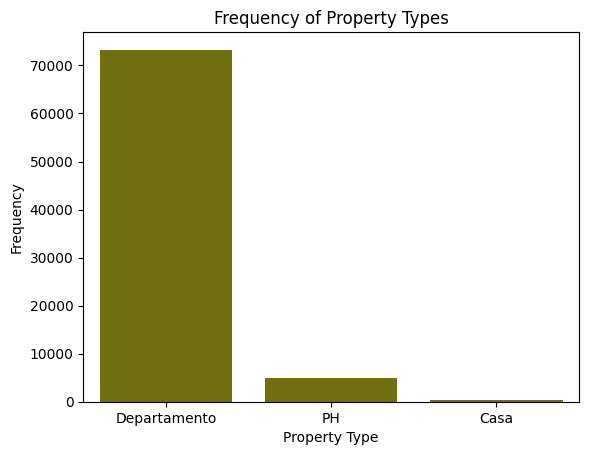

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ahora vamos a calcular la frecuencia por cada tipo de propiedad
prop_type_counts = df_ee7_so['prop_type'].value_counts().reset_index()
prop_type_counts.columns = ['prop_type', 'frequency']

# Gráficos
sns.barplot(x="prop_type", y="frequency", data=prop_type_counts, color="olive")
plt.title('Frequency of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='prop_type', ylabel='price'>

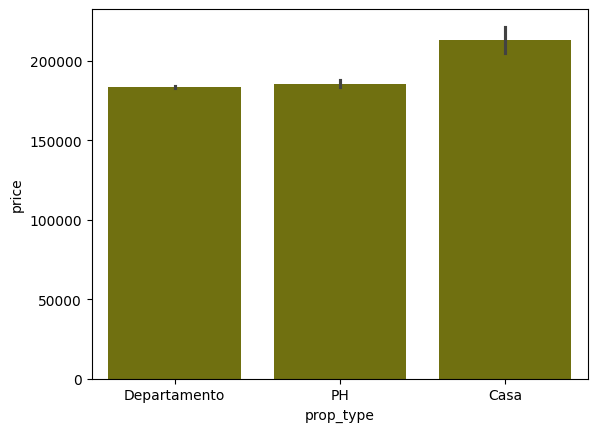

In [54]:
#Ahora observamos tambien como es la distribución de tipo de propiedades
sns.barplot(x="prop_type", y = "price", data=df_ee7_so, color = "olive")

<Axes: xlabel='l3', ylabel='price'>

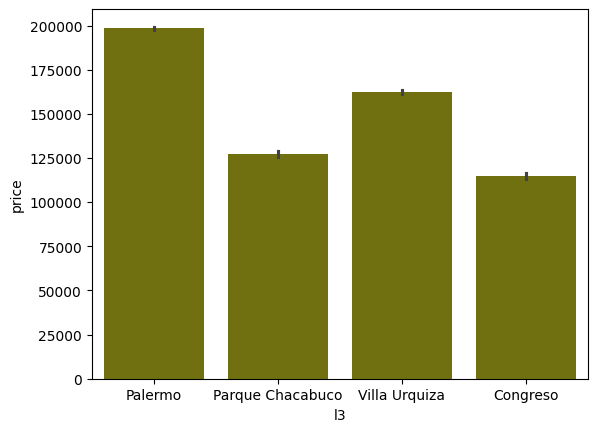

In [55]:

sns.barplot(x="l3", y= "price", data=df_ee7_so, color = "olive")

Se graficaron barras para visualizar el precio promedio según tipo de propiedad y barrio. Las casas y la zona de Palermo presentan los valores más altos, mientras que los departamentos y barrios como Parque Chacabuco muestran precios más accesibles. Entendemos que estos patrones ayudan a interpretar la segmentación del mercado y son relevantes para modelos predictivos.

In [24]:
df_ee7_so.info()


<class 'pandas.core.frame.DataFrame'>
Index: 78731 entries, 590 to 478726
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_on       78731 non-null  object 
 1   l2               78731 non-null  object 
 2   l3               78731 non-null  object 
 3   prop_type        78731 non-null  object 
 4   rooms            78731 non-null  float64
 5   bathrooms        78731 non-null  float64
 6   surface_total    78731 non-null  int64  
 7   surface_covered  78731 non-null  int64  
 8   price            78731 non-null  int64  
 9   description      78731 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.6+ MB


In [58]:
df_ee7_so["price"].max()

545000

In [56]:
df_ee7_so["rooms"].max()

4.0

In [57]:
df_ee7_so["surface_total"].max()

143

# G. Nueva matriz de correlaciones

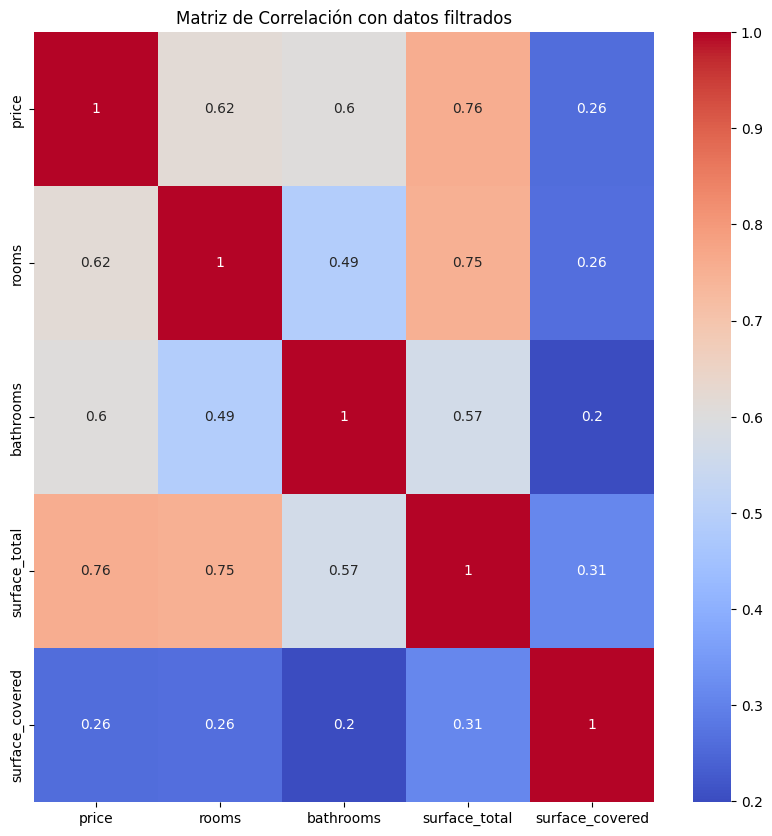

In [25]:
df_ee7_so.columns
target_so = "price"
regresores_orig_so = ['rooms', 'bathrooms', 'surface_total', 'surface_covered']
numericas_so = [target_so] + regresores_orig_so
df_num_so = df_ee7_so[numericas_so]
df_num_so
corr = df_num_so.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con datos filtrados')
plt.show()

In [26]:
df_ee7_so["price"].describe()

,price
count,78731.000000
mean,183502.817531
std,92932.803252
min,2170.000000
25%,117000.000000
50%,159000.000000
75%,230000.000000
max,545000.000000


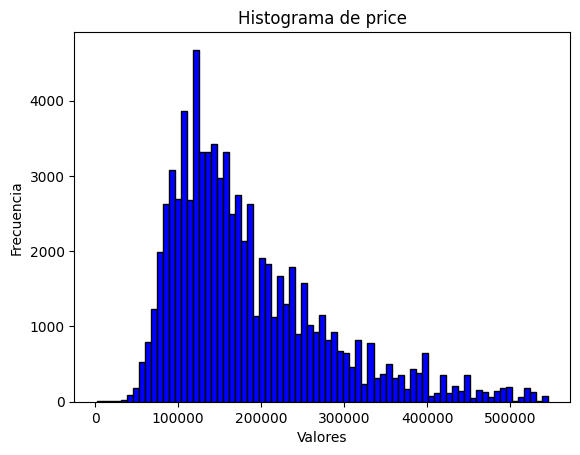

In [ ]:
df_ee7_so['price'].plot(kind='hist', bins=75, color='blue', edgecolor='black')
plt.title('Histograma de price')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

En el histograma del dataframe original tuvimos que aplicar el logaritmo de la variable porque de otro modo era ilegible. En el dataframe filtrado puede trabajarse con los datos sin transformar, que puede verse la distribución

# PUNTO 4

In [27]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
#Como no vamos a utilizar "created_on" la eliminamos
df_ee7_so.drop(columns=["created_on"], axis = 1, inplace=True)

In [29]:
#Hacemos la division del train test split
X = df_ee7_so.drop(columns=["price"], axis = 1)
y = df_ee7_so["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) #Aplicamos random_state= 7 por ser ese nuestro grupo

# PUNTO 5

# A. Modelo Lineal

Para los modelos de regresion lineal y lasso vamos a trabajar solamente con las columnas numericas, al considerar las categoricas las metricasno nos daban con sentido.

In [31]:
Xnum = df_num_so.drop(columns=["price"], axis = 1)
ynum = df_num_so["price"]

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(Xnum, ynum, test_size=0.2, random_state=7)

In [45]:
#MCO
mco = LinearRegression()
mco.fit(X_train_num, y_train_num)
y_pred_mco = mco.predict(X_test_num)

print("=== MCO ===")
print("R2:", round(mco.score(X_test_num, y_test_num), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_num, y_pred_mco)), 4))
print("MAE:", round(mean_absolute_error(y_test_num, y_pred_mco), 4))

=== MCO ===
R2: 0.6237
RMSE: 57222.3137
MAE: 40239.3674


# B. Modelo Lasso

In [46]:
#LASSO
# --- MODELO LASSO ---
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

lasso = LassoCV(cv=5, random_state=7)
lasso.fit(X_train_scaled, y_train_num)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\n=== LASSO ===")
print("Alpha óptimo:", round(lasso.alpha_, 6))
print("R2:", round(lasso.score(X_test_scaled, y_test_num), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_num, y_pred_lasso)), 4))
print("MAE:", round(mean_absolute_error(y_test_num, y_pred_lasso), 4))

coef_lasso = pd.Series(lasso.coef_, index=Xnum.columns)
print("\nCoeficientes LASSO:")
print(coef_lasso)


=== LASSO ===
Alpha óptimo: 214.952261
R2: 0.6236
RMSE: 57231.1133
MAE: 40247.2043

Coeficientes LASSO:
rooms               6342.732143
bathrooms          22589.312789
surface_total      52225.592302
surface_covered     1389.366503
dtype: float64


Luego de aplicar la regularización mediante el modelo Lasso, no se observa una mejora significativa en el ajuste del modelo a los datos observados (R² = 0,6237 con MCO frente a R² = 0,6236 con Lasso). Por lo tanto, la penalización sobre el uso de variables resulta prácticamente irrelevante en este caso.
Del mismo modo, tanto el MAE (40.239 con MCO vs. 40.247 con Lasso) como el RMSE (57.222 vs. 57.231) muestran diferencias mínimas, lo que indica que el poder predictivo del modelo no mejora sustancialmente con la regularización.
Sin embargo, a pesar de que el R² es prácticamente el mismo, es preferible utilizar la regresión Lasso, ya que permite obtener un modelo más simple y con menor riesgo de sobreajuste, sin sacrificar capacidad explicativa.


# A. I y II - Coeficientes y Significatividad estadística

In [32]:
# Para calcular significancia estadística (p-valores)
X_train_sm = sm.add_constant(X_train_num).astype(float)
y_train_sm = y_train_num.astype(float)

modelo_sm = sm.OLS(y_train_sm, X_train_sm).fit()
print("\n=== COEFICIENTES MCO CON SIGNIFICANCIA ===")
print(modelo_sm.summary())


=== COEFICIENTES MCO CON SIGNIFICANCIA ===
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 2.570e+04
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:29:08   Log-Likelihood:            -7.7934e+05
No. Observations:               62984   AIC:                         1.559e+06
Df Residuals:                   62979   BIC:                         1.559e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

La bondad de ajuste nos dice que el 62% de la variabilidad del precio es explicada por el modelo. Dado el contexto de gran heterogeneidad de productos no resulta un mal ajuste.

Por otro lado, que el inmueble tenga una habitación adicional esta asociado con con un aumento en promedio de U$S 6.828 en el precio de lista.

El hecho de añadir un baño adicional esta asociado a tambien un incremento en promedio de U$S 41.884 en el precio de lista del inmueble. Si bien el impacto es mucho mayor que el de la inclusión de una habitación adicional se puede razonar que el hecho de un inmueble tenga más de un baño quizás este asociado a un salto de 2 o más ambientes en el inmueble total (tal como vimos en la correlación entre las habitaciones y los baños), lo que sugiere un salto de precio de manera indirecta.


Por otro lado, el hecho de agregar un m² adicional de superficie total esta asociado con un incremento, aproximado en promedio, del precio de US 1.965, mientras que el incremento de un m² de superficie cubierta esta asociado a un incremento de U$S 19. Como naturalmente los metros cubiertos son parte de los metros totales, este coeficiente lo que me indica es cuanto se esperaría que fuera el diferencial de precio, en promedio,  entre el metro cubierto vs el no cubierto (semicubierto, descubierto, etc). Esto quiere decir que el hecho de agregar un metro cuadrado cubierto, en promedio, sería de US 1965 + US 19 = US 1974.

Respecto  la significatividad se puede comentar que todas las variables son estadísticamente significativas a un nivel de significatividad del 1% o menor (todos sus p-values son 0.000, por lo que la probabilidad de cometer error de tipo I es muy baja). Por otro lado, el estadístico F de significatividad conjunta tambien es muy alto (p-value cercano a cero), lo que sugiere que todas las variables son conjuntamente significativamente conjuntas. Por otro lado, la prueba Durwin-Watson, nos permite afirmar que no existe autocorrelación serial en los residuos, lo cual es deseable para cumplir los supuestos clásicos del modelo lineal.

# Punto 6

Para entrenar los modelos de Random Forest y Gradient Boosting si vamos a utilizar el dataset que contiene variables explicativas categoricas y numericas ya que estos modelos no son lineales y consideran las ramificaciones que puede existir en la información.

In [41]:
#importamos randomforestregressor
from sklearn.ensemble import RandomForestRegressor
#importamos pipeline
from sklearn.pipeline import Pipeline
#importamos onehotencoder
from sklearn.preprocessing import OneHotEncoder
#importamos column transformer
from sklearn.compose import ColumnTransformer
#importamos randomforestregressor
from sklearn.ensemble import RandomForestRegressor
#importamos StandardScaler
from sklearn.preprocessing import StandardScaler
#importamos randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV


In [34]:
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [42]:
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
])
# --- RANDOM FOREST ---
rf = RandomForestRegressor(random_state=7)

# Create a pipeline that includes preprocessing and the model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocesador),
                              ('regressor', rf)])

param_grid_rf = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [10, 15],
    "regressor__min_samples_split": [2, 5]
}
gs_rf = RandomizedSearchCV(pipeline_rf, param_grid_rf, cv=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)
y_pred_rf = gs_rf.predict(X_test)

print("\n=== RANDOM FOREST ===")
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 4))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



=== RANDOM FOREST ===
RMSE: 42998.8784
MAE: 29477.1942


In [43]:
rf_pred = gs_rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print("R2:", round(r2_rf, 4))

R2: 0.7875


Dado los ajustes realizados al modelo (cantidad de árboles, profundidad, y min_samples_split), se obtiene un R² de 0,7862. Al compararlo con la regresión por Mínimos Cuadrados Ordinarios (MCO), el modelo de Random Forest muestra un desempeño significativamente superior, evidenciado en su mayor capacidad de ajuste. Esta diferencia es esperable, dadas las fortalezas y limitaciones propias de cada enfoque. Además, el tamaño de la muestra influye considerablemente: aunque las viviendas suelen compartir características similares, los precios no siguen una relación estrictamente lineal, lo que favorece el desempeño de modelos no paramétricos como Random Forest.

In [39]:
# --- GRADIENT BOOSTING ---
gb = GradientBoostingRegressor(random_state=7)

# Create a pipeline that includes preprocessing and the model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocesador),
                              ('regressor', gb)])

param_grid_gb = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [3, 5],
    "regressor__learning_rate": [0.05, 0.1]
}
gs_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=3, n_jobs=-1)
gs_gb.fit(X_train, y_train)
y_pred_gb = gs_gb.predict(X_test)

print("\n=== GRADIENT BOOSTING ===")
print("R2:", round(gs_gb.score(X_test, y_test), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_gb)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_gb), 4))


=== GRADIENT BOOSTING ===
R2: 0.7669
RMSE: 45038.3594
MAE: 31928.0161


Dados los ajustes realizados al modelo (cantidad de estimadores, profundidad y learning rate), se obtiene un coeficiente de determinación R² de 0,7669. En comparación con la regresión por Mínimos Cuadrados Ordinarios (MCO), el modelo de Gradient Boosting muestra un desempeño notablemente superior, lo cual se refleja en una mayor capacidad de ajuste.
Este resultado es esperable, ya que el tamaño de la muestra influye considerablemente y el enfoque de Gradient Boosting presenta ventajas sustanciales: al corregir iterativamente los errores de los árboles anteriores, logra una mayor capacidad de modelado no lineal y, en consecuencia, una mejor capacidad predictiva que la regresión MCO.


# PUNTO 7 (BONUS)

# B. Elección XGBOOST

En este punto bonus, seleccionamos el modelo XGBOOST por su capacidad para manejar eficientemente variables numericas y categoricas procesadas. Este es un modelo que permite capturar relaciones no lineales, como son las variables explicativas del dataset con el que hemos trabajado.

Creemos que esta opcion es una alternativa solida para probar el desempeño frente al Random Forest.

In [35]:
#importamos xgboost
from xgboost import XGBRegressor
#entrenamos el modelo xgboost para verificar si hay mejora de performance
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
])

# Pipeline completo
pipeline_xg = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', XGBRegressor(n_estimators=100, random_state=7))
])

In [36]:
#importamos el columtransformer
from sklearn.compose import ColumnTransformer
#importamos el onehotencoder
from sklearn.preprocessing import OneHotEncoder
#importamos el StandardScaler
from sklearn.preprocessing import StandardScaler

In [37]:
pipeline_xg.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['l2', 'l3', 'prop_type',
                                                   'description'])])),
                ('clasificador',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=7, ...))])

In [38]:
#validación de XGBOOST
xg_pred = pipeline_xg.predict(X_test)
xgb_r2_rf = r2_score(y_test, xg_pred)

print("\n=== XGBOOST ===")
print("R2:", round(xgb_r2_rf, 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, xg_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, xg_pred), 4))


=== XGBOOST ===
R2: 0.7741
RMSE: 44341.7131
MAE: 31154.7344


# PUNTO 8


In [47]:
print("=== MCO ===")
print("R2:", round(mco.score(X_test_num, y_test_num), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_num, y_pred_mco)), 4))
print("MAE:", round(mean_absolute_error(y_test_num, y_pred_mco), 4))

#-------------------------------------------------------------------------------
print("\n=== LASSO ===")
print("Alpha óptimo:", round(lasso.alpha_, 6))
print("R2:", round(lasso.score(X_test_scaled, y_test_num), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_num, y_pred_lasso)), 4))
print("MAE:", round(mean_absolute_error(y_test_num, y_pred_lasso), 4))

coef_lasso = pd.Series(lasso.coef_, index=Xnum.columns)
print("\nCoeficientes LASSO:")
print(coef_lasso)
#-------------------------------------------------------------------------------
print("\n=== RANDOM FOREST ===")
print("R2:", round(r2_rf, 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf), 4))
#-------------------------------------------------------------------------------
print("\n=== GRADIENT BOOSTING ===")
print("R2:", round(gs_gb.score(X_test, y_test), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_gb)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_gb), 4))
#-------------------------------------------------------------------------------
"""PUNTO 7* BONUS"""
print("\n=== XGBOOST ===")
print("R2:", round(xgb_r2_rf, 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, xg_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, xg_pred), 4))

=== MCO ===
R2: 0.6237
RMSE: 57222.3137
MAE: 40239.3674

=== LASSO ===
Alpha óptimo: 214.952261
R2: 0.6236
RMSE: 57231.1133
MAE: 40247.2043

Coeficientes LASSO:
rooms               6342.732143
bathrooms          22589.312789
surface_total      52225.592302
surface_covered     1389.366503
dtype: float64

=== RANDOM FOREST ===
R2: 0.7875
RMSE: 42998.8784
MAE: 29477.1942

=== GRADIENT BOOSTING ===
R2: 0.7669
RMSE: 45038.3594
MAE: 31928.0161

=== XGBOOST ===
R2: 0.7741
RMSE: 44341.7131
MAE: 31154.7344


## CONCLUSION

En el contexto de modelos predictivos, suele ser recomendable emplear enfoques más complejos como Random Forest o Gradient Boosting en lugar de una regresión por Mínimos Cuadrados Ordinarios (MCO), dado su mejor desempeño general frente a relaciones no lineales y conjuntos de datos con múltiples variables explicativas.

En cuanto a capacidad explicativa del modelo se observa que los modelos que mejor se ajustan a los datos son en RandomForest y el XGBoost ambos con valor de R2 igual a 0.7875 en el caso del RF y de 0.7741 en el caso del XGB. Los modelos de regresión lineal ajustado por MCO y LASSO dan valores notablemente por debajo en torno al 0.62 como se evidencia en la celda previa.

El modelo que presenta menor dispersión en los errores es el Random Forest, tornándose por el momento, en el mejor predictor. Esta afirmación se mantiene al observar que este modelo presenta el error absoluto medio mas bajo de los cinco modelos presentados.

El modelo XGBoost se mantiene competitivo con el anterior, como vimos, da un buen valor de R2 y su RMSE no se aleja demasiado de aquel del modelo Random Forest, indicando un muy buen desempeño también en términos de precisión.

Como se observa el modelo Gradient Boosting también representa buenas métricas pero no alcanza los niveles de eficacia de los dos modelos antes mencionados.

Los modelos lasso y MCO son los menos adecuados para la predicción presentando elevados MAE y RMSE. Tienen un desempeño muy similar y limitado. Se observa que a pesar de la regularización, el modelo lasso no mejora significativamente las predicciones del modelo MCO.

Como conclusión seleccionamos como el mejor predictor para el caso en análisis, el modelo Random Forest debido a su eficacia al presentar menor cantidad de errores y mayor precisión.

Cabe mencionar que de querer predecir otras semillas del dataset algo mas complejas, quizás el mejor predictor sería el xgboost, ya que es un modelo mas flexible.

Disclaimer:  Los algoritmos implementados en este trabajo final de curso han sido ejecutados sobre la base de un análisis exploratorio de datos (EDA) exhaustivo. No obstante, creemos que podrían existir configuraciones superadoras, así como enfoques alternativos para la transformación de variables explicativas. Por ello, los resultados obtenidos podrían ser susceptibles de mejora mediante ajustes adicionales en la ingeniería de variables.